# G00349377 - Jake Warren - Emerging Technology Project 2019

<H1>Adapted from:</H1>

https://keras.io/examples/mnist_cnn/

<H2>Research:</H2>

To complete this project, I needed to improve my knowledge on Neural Networks and Datasets. The Dataset I chose is the MNIST DATASET:  http://yann.lecun.com/exdb/mnist/  . To build the neural network I used Keras as it was covered in the labs and had extensive documentation available. While researching Keras I found this: https://stackabuse.com/image-recognition-in-python-with-tensorflow-and-keras/ , While not fully applicable to this project I found the explanations to be quite helpful. I also came across: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/ which helped my understandings of Epochs.

<H2>Imports</H2>

In [1]:
#Imports 
#Numpy used for mathematics
import numpy as np
#matplotlib used for graphs, plots etc.
import matplotlib.pyplot as plt
#Keras neural network API
import keras as kr
#Tensorflow used as backend for K
import tensorflow as tf

Using TensorFlow backend.


<H2>Importing and parsing the dataset</H2>

In [2]:
#Import MNIST dataset, this is used by neural network to learn the digits.
(training_image, training_label), (testing_image, testing_label) = kr.datasets.mnist.load_data()

#Reshape the data
training_image = training_image.reshape(60000, 784)
testing_image = testing_image.reshape(10000, 784)

#Converting to float32 as it enables better division
training_image = training_image.astype('float32')
testing_image = testing_image.astype('float32')

#Divide images by 255
training_image = training_image/255
testing_image = testing_image/255 

#MNIST Dataset contains digits 0-10
digits= 10

training_label = kr.utils.np_utils.to_categorical(training_label, digits)
testing_label = kr.utils.np_utils.to_categorical(testing_label, digits)


<H2>Displaying example images from dataset</H2>

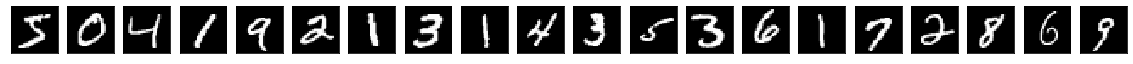

In [3]:
#Plot examples
plt.figure(1, figsize=(20,10))

#For loop, prints out first 20 images in the dataset
for i in range(20):
    plt.subplot(1,20,i+1)
    
    plt.imshow(training_image[i].reshape(28,28), cmap='gray', interpolation='nearest')
    
    #Remove label markings
    plt.xticks([])
    plt.yticks([])

<H2>Creating the model</H2>

In [4]:
#Create model
model = kr.models.Sequential()
print("Model created successfully")

#Add Layers to the model

# 392 neurons in first two layers, last layer dropout layer.
model.add(kr.layers.Dense(392, activation='relu', input_shape=(784,)))
model.add(kr.layers.Dense(392, activation='relu'))
model.add(kr.layers.Dropout(0.2))
model.add(kr.layers.Dense(10, activation='softmax'))

print("Layers added successfully")

Model created successfully
Layers added successfully


<H2>Model Summary</H2>

In [5]:
#Print model Summary
print("Model Summary")
model.summary()

Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 392)               154056    
_________________________________________________________________
dropout_1 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


<H2>Model Compiling</H2>

In [6]:
# Compiles the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model compiled successfully")

Model compiled successfully


<H2>Model Training</H2>

In [7]:
#Epoch is how many times the test is run
#The accuracy goes up with each test/Epoch
#Adding too many epochs makes the model 'too accurate', making prediction improbable
history = model.fit(training_image, training_label, batch_size=50, epochs=5, verbose=1, validation_data=(testing_image, testing_label))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.2059 - accuracy: 0.9376 - val_loss: 0.1028 - val_accuracy: 0.9674
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0835 - accuracy: 0.9743 - val_loss: 0.0755 - val_accuracy: 0.9749
Epoch 3/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0569 - accuracy: 0.9817 - val_loss: 0.0813 - val_accuracy: 0.9762
Epoch 4/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.0446 - accuracy: 0.9852 - val_loss: 0.0770 - val_accuracy: 0.9772
Epoch 5/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0790 - val_accuracy: 0.9768


<H2>Display Accuracy and Loss</H2>

In [8]:
#Displays accuracy and loss of model
score = model.evaluate(training_image, training_label, verbose=0)
print('Test cross-entropy loss: %0.9f' % score[0])
print('Test accuracy: %0.9f' % score[1])

Test cross-entropy loss: 0.023338351
Test accuracy: 0.992216647


<H2>Graphing the Accuracy and Loss</H2>

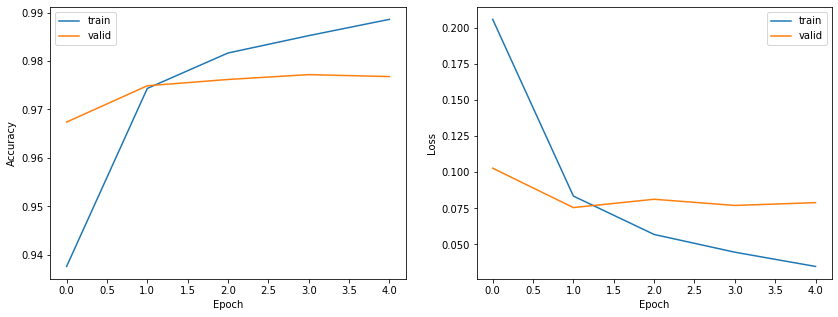

In [9]:
plt.figure(1, figsize=(14,5))
#Accuracy Plotting
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#Loss Plotting
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



<H2>Save and Load the Model</H2>

In [10]:
#Save Model
model.save('predictionModel.h5')
print("Model saved successfully")

Model saved successfully


In [11]:
#Load Model
loadedModel = kr.models.load_model('predictionModel.h5')
print("Model loaded successfully.")

Model loaded successfully.


<H2>Testing the model</H2>

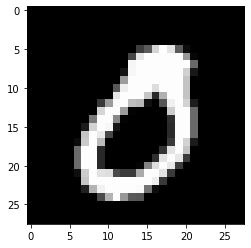

0

In [12]:
#Selects image from MNIST dataset
plt.imshow(training_image[75].reshape(28, 28), cmap="gray")
plt.show()
np.argmax(loadedModel.predict(training_image[75:76]))

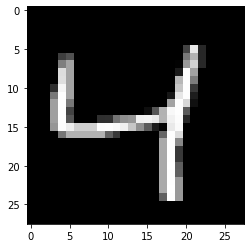

4

In [13]:
#Selects image from MNIST dataset
plt.imshow(training_image[2].reshape(28, 28), cmap="gray")
plt.show()
np.argmax(loadedModel.predict(training_image[2:3]))

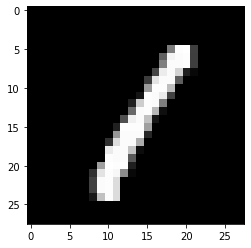

1

In [14]:
#Selects image from MNIST dataset
plt.imshow(training_image[3].reshape(28, 28), cmap="gray")
plt.show()
np.argmax(loadedModel.predict(training_image[3:4]))

References: <br>
   * https://keras.io/examples/mnist_cnn/ <br>
   * https://www.tensorflow.org/tutorials/quickstart/beginner<br>
   * https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb<br>
   * https://web.microsoftstream.com/video/f6bd0f1c-802c-4c0a-bc54-211bc9d85ba5<br>
   * https://web.microsoftstream.com/video/12b70f05-45d3-4d78-9d8c-6ee6c3745809